In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import plot_roc_curve

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
file_path = '/content/drive/MyDrive/kb차차차/KB_보배_총데이터_찐.csv'

In [ ]:
cars = pd.read_csv(file_path, encoding='cp949')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
cars = cars[['제조사', '모델', '차종', '가격(만원)', '연식', '주행거리(km)', '연료', '변속기', '연비', '배기량(cc)']]

In [ ]:
cars['모델'].value_counts()

그랜저      5892
쏘나타      4113
카니발      3513
모닝       3330
아반떼      3202
         ... 
GP380       1
토스카         1
포니          1
엑셀          1
크레도스        1
Name: 모델, Length: 151, dtype: int64

## 현대 그랜저 가솔린

In [ ]:
hyundai = cars[cars['제조사'] == '현대']

In [ ]:
grandeur = hyundai[hyundai['모델'] == '그랜저']

In [ ]:
grandeur_oil = grandeur[grandeur['연료'] == '가솔린']
grandeur_oil.head(3)

,제조사,모델,차종,가격(만원),연식,주행거리(km),연료,변속기,연비,배기량(cc)
14928,현대,그랜저,대형,2395,2019,36096,가솔린,오토,0.0,2359
14932,현대,그랜저,대형,770,2011,153000,가솔린,오토,0.0,2999
14933,현대,그랜저,대형,3590,2020,17500,가솔린,오토,11.0,2497


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0,

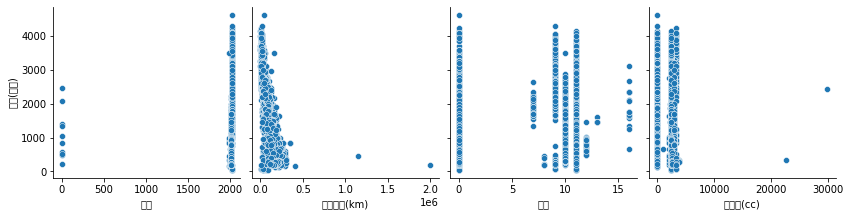

In [ ]:
sns.pairplot(data=grandeur_oil, x_vars=['연식', '주행거리(km)', '연비', '배기량(cc)'], y_vars='가격(만원)', size=3)

In [ ]:
X = grandeur_oil[['연식', '주행거리(km)', '연비', '배기량(cc)']].values
X[:5]

array([[2.01900e+03, 3.60960e+04, 0.00000e+00, 2.35900e+03],
       [2.01100e+03, 1.53000e+05, 0.00000e+00, 2.99900e+03],
       [2.02000e+03, 1.75000e+04, 1.10000e+01, 2.49700e+03],
       [2.01200e+03, 1.77779e+05, 1.00000e+01, 2.99900e+03],
       [2.01700e+03, 8.66230e+04, 1.00000e+01, 2.99900e+03]])

In [ ]:
y = grandeur_oil['가격(만원)'].values
y[:5]

array([2395,  770, 3590,  720, 1960])

In [ ]:
X.shape, y.shape

((4077, 4), (4077,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2853, 4), (1224, 4), (2853,), (1224,))

# 선형회귀 (1차항)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_pred = lin_reg.predict(X_train)
train_pred[:5]

array([1293.46042559, 1077.11761759, 1183.94309472, 1263.58837482,
       1727.40425372])

In [ ]:
y_train[:5]

array([1200,  340,  860, 1850, 2350])

In [ ]:
r2_score(y_train, train_pred)

0.4051202551285943

In [ ]:
test_pred = lin_reg.predict(X_test)
test_pred[:5]

array([1596.78194502, 1236.70937015, 1837.23908494, 2051.0507076 ,
       1658.66963269])

In [ ]:
y_test[:5]

array([1650, 1170, 1990, 3850, 1250])

In [ ]:
r2_score(y_test, test_pred)

0.5128335064153923

# 선형회귀 (2차항)

In [ ]:
poly = PolynomialFeatures(include_bias=False)

In [ ]:
poly.fit_transform(X_train)[:2]

array([[2.014000e+03, 1.420000e+05, 1.100000e+01, 2.359000e+03,
        4.056196e+06, 2.859880e+08, 2.215400e+04, 4.751026e+06,
        2.016400e+10, 1.562000e+06, 3.349780e+08, 1.210000e+02,
        2.594900e+04, 5.564881e+06],
       [2.009000e+03, 1.700000e+05, 1.100000e+01, 2.359000e+03,
        4.036081e+06, 3.415300e+08, 2.209900e+04, 4.739231e+06,
        2.890000e+10, 1.870000e+06, 4.010300e+08, 1.210000e+02,
        2.594900e+04, 5.564881e+06]])

In [ ]:
scaler = StandardScaler() 
lin_reg = LinearRegression()

In [ ]:
model = Pipeline(steps=[('poly', poly),
                        ('scaler', scaler),
                        ('lin_reg', lin_reg)])

In [ ]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
train_pred = model.predict(X_train)
train_pred[:5]

array([1194.35698945,  248.85935551, 1035.01435339, 1658.76323319,
       2370.73884218])

In [ ]:
y_train[:5]

array([1200,  340,  860, 1850, 2350])

In [ ]:
r2_score(y_train, train_pred)

0.7885870553273788

In [ ]:
test_pred = model.predict(X_test)
test_pred[:5]

array([1561.96035408, 1299.85462971, 2083.71837111, 2824.23864363,
       1480.46257913])

In [ ]:
y_test[:5]

array([1650, 1170, 1990, 3850, 1250])

In [ ]:
r2_score(y_test, test_pred)

0.8195301298322277

# ★ PolynomialFeatures(degree=3) + StandardScaler (지금까지 제일 좋음) ★

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
X_train_poly = poly.fit_transform(X_train)
X_train_poly[:5]

array([[2.01400000e+03, 1.42000000e+05, 1.10000000e+01, 2.35900000e+03,
        4.05619600e+06, 2.85988000e+08, 2.21540000e+04, 4.75102600e+06,
        2.01640000e+10, 1.56200000e+06, 3.34978000e+08, 1.21000000e+02,
        2.59490000e+04, 5.56488100e+06, 8.16917874e+09, 5.75979832e+11,
        4.46181560e+07, 9.56856636e+09, 4.06102960e+13, 3.14586800e+09,
        6.74645692e+11, 2.43694000e+05, 5.22612860e+07, 1.12076703e+10,
        2.86328800e+15, 2.21804000e+11, 4.75668760e+13, 1.71820000e+07,
        3.68475800e+09, 7.90213102e+11, 1.33100000e+03, 2.85439000e+05,
        6.12136910e+07, 1.31275543e+10],
       [2.00900000e+03, 1.70000000e+05, 1.10000000e+01, 2.35900000e+03,
        4.03608100e+06, 3.41530000e+08, 2.20990000e+04, 4.73923100e+06,
        2.89000000e+10, 1.87000000e+06, 4.01030000e+08, 1.21000000e+02,
        2.59490000e+04, 5.56488100e+06, 8.10848673e+09, 6.86133770e+11,
        4.43968910e+07, 9.52111508e+09, 5.80601000e+13, 3.75683000e+09,
        8.05669270e+11,

In [ ]:
std_scaler = StandardScaler()

In [ ]:
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)
X_train_poly_scaled[:5]

array([[ 0.05634062,  0.56783609,  0.84282497,  0.36498958,  0.05627439,
         0.57387832,  0.84178648,  0.36794768,  0.06040661,  1.23100276,
         0.64515277,  0.90541432,  0.86766284,  0.00879038,  0.05605803,
         0.5769068 ,  0.84073829,  0.36790246,  0.06145714,  1.23277879,
         0.64920678,  0.90430271,  0.86696459,  0.00940875, -0.01697604,
         0.19324276,  0.06664874,  1.34120699,  1.19914307,  0.17956533,
         0.92128139,  0.94102444,  0.11055713, -0.02506072],
       [ 0.01209869,  0.96992202,  0.84282497,  0.36498958, -0.03192089,
         0.97019588,  0.83640182,  0.3638076 ,  0.16995564,  1.64651364,
         0.93606198,  0.90541432,  0.86766284,  0.00879038, -0.07562866,
         0.9684651 ,  0.82998779,  0.35963252,  0.1705675 ,  1.64259445,
         0.93634567,  0.89887071,  0.86280075,  0.00870153, -0.00352751,
         0.33955797,  0.1457978 ,  1.7806225 ,  1.55346066,  0.29005073,
         0.92128139,  0.94102444,  0.11055713, -0.02506072],
  

In [ ]:
X_test_poly = poly.transform(X_test)
X_test_poly[:5]

array([[2.01500000e+03, 1.02520000e+05, 1.10000000e+01, 2.35900000e+03,
        4.06022500e+06, 2.06577800e+08, 2.21650000e+04, 4.75338500e+06,
        1.05103504e+10, 1.12772000e+06, 2.41844680e+08, 1.21000000e+02,
        2.59490000e+04, 5.56488100e+06, 8.18135338e+09, 4.16254267e+11,
        4.46624750e+07, 9.57807078e+09, 2.11783561e+13, 2.27235580e+09,
        4.87317030e+11, 2.43815000e+05, 5.22872350e+07, 1.12132352e+10,
        1.07752112e+15, 1.15613854e+11, 2.47939166e+13, 1.24049200e+07,
        2.66029148e+09, 5.70511600e+11, 1.33100000e+03, 2.85439000e+05,
        6.12136910e+07, 1.31275543e+10],
       [2.01300000e+03, 1.18215000e+05, 0.00000000e+00, 2.99900000e+03,
        4.05216900e+06, 2.37966795e+08, 0.00000000e+00, 6.03698700e+06,
        1.39747862e+10, 0.00000000e+00, 3.54526785e+08, 0.00000000e+00,
        0.00000000e+00, 8.99400100e+06, 8.15701620e+09, 4.79027158e+11,
        0.00000000e+00, 1.21524548e+10, 2.81312447e+13, 0.00000000e+00,
        7.13662418e+11,

In [ ]:
X_test_poly_scaled = std_scaler.transform(X_test_poly) 
X_test_poly_scaled[:5]

array([[ 6.51890094e-02,  8.94933631e-04,  8.42824971e-01,
         3.64989581e-01,  7.39397576e-02,  7.25024884e-03,
         8.42863412e-01,  3.68775699e-01, -6.06497021e-02,
         6.45132436e-01,  2.34970780e-01,  9.05414320e-01,
         8.67662840e-01,  8.79037948e-03,  8.24739774e-02,
         9.13888737e-03,  8.42891594e-01,  3.69558918e-01,
        -6.00471453e-02,  6.46852054e-01,  2.38674973e-01,
         9.05389104e-01,  8.67797355e-01,  9.55019137e-03,
        -2.86927864e-02,  3.15582565e-02, -2.08143210e-02,
         7.21631120e-01,  6.99555263e-01,  2.37809128e-02,
         9.21281387e-01,  9.41024436e-01,  1.10557132e-01,
        -2.50607184e-02],
       [ 4.74922356e-02,  2.26278457e-01, -1.32719522e+00,
         8.18137398e-01,  3.86177998e-02,  2.31225074e-01,
        -1.32715344e+00,  8.19324419e-01, -1.72058393e-02,
        -8.76230938e-01,  7.31250410e-01, -1.28380068e+00,
        -8.10170488e-01,  1.84408091e-01,  2.96683076e-02,
         2.32274322e-01, -1.32

In [ ]:
lin_reg3 = LinearRegression()  

lin_reg3.fit(X_train_poly_scaled, y_train)

train_pred = lin_reg3.predict(X_train_poly_scaled)

r2_score(y_train, train_pred)

0.8664188200274847

In [ ]:
test_pred = lin_reg3.predict(X_test_poly_scaled)

r2_score(y_test, test_pred)

0.8791892398510257

# poly(degree=2,4,5) + standardscaler + linearregression 과대적합

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False) 
std_scaler = StandardScaler()
lin_reg = LinearRegression()

In [ ]:
model = Pipeline(steps=[('deg_2_poly', poly),
                        ('scaler', std_scaler),
                        ('reg', lin_reg)])

In [ ]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('deg_2_poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
train_pred = model.predict(X_train)
train_pred[:5]

array([1112.86197875,  422.35187743,  766.24125591, 1579.24027465,
       2452.08802245])

In [ ]:
r2_score(y_train, train_pred)

0.8854012030316147

In [ ]:
test_pred = model.predict(X_test)
test_pred[:5]

array([1432.22741149, 1197.18581371, 2041.38918987, 3525.29209819,
       1351.7776939 ])

In [ ]:
r2_score(y_test, test_pred)

-60246.27598572645

# 로지스틱

In [ ]:
logit_model = Pipeline(steps=[('scaler', StandardScaler()),
                              ('clf', LogisticRegression(random_state=42))])

In [ ]:
logit_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
train_pred = logit_model.predict(X_train)
accuracy_score(y_train, train_pred)

0.03399929898352611

In [ ]:
test_pred = logit_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.015522875816993464

# SGD

In [ ]:
scaler = StandardScaler()
reg = SGDRegressor()
model = Pipeline(steps=[('scaler', scaler),
                        ('reg', reg)])

In [ ]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [ ]:
train_pred  = model.predict(X_train)
train_pred[:5]

array([1353.03613541, 1167.21057062, 1191.48508223, 1327.64733231,
       1647.87435357])

In [ ]:
mean_squared_error(y_train, train_pred)

467882.80417359975

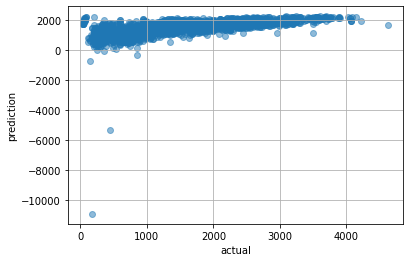

In [ ]:
plt.scatter(y_train, train_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('prediction')
plt.grid()
plt.show()

In [ ]:
r2_score(y_train, train_pred)

0.39745540584756

In [ ]:
test_pred  = model.predict(X_test)
test_pred[:5]

array([1613.13230301, 1224.05246237, 1829.48926542, 1935.5455654 ,
       1676.1910638 ])

In [ ]:
r2_score(y_test, test_pred)

0.4753717256157287

# Ridge(l2)

In [ ]:
scaler = StandardScaler()
reg = Ridge(alpha=0.0001)  
model3 = Pipeline(steps=[('scaler', scaler),
                         ('reg', reg)])

In [ ]:
model3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 Ridge(alpha=0.0001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [ ]:
train_pred = model3.predict(X_train)
r2_score(y_train, train_pred)

0.40512025512859395

In [ ]:
test_pred = model3.predict(X_test)
r2_score(y_test, test_pred)

0.5128334979865432

## 앙상블 학습

# 머신 러닝 비교

In [ ]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
log_clf = LogisticRegression(random_state=42, n_jobs=-1)
sgd_clf = SGDClassifier(loss='log', n_jobs=-1, random_state=42) 
tree_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

In [ ]:
classifiers = [knn_clf, log_clf, sgd_clf, tree_clf, svm_clf]
for clf in classifiers:
    clf.fit(X_train, y_train)  # 모델 훈련
    acc = clf.score(X_test, y_test)  # 테스트 셋 평가 점수(정확도) 계산
    print(clf.__class__.__name__, 'accuracy:', acc)

KNeighborsClassifier accuracy: 0.049019607843137254
LogisticRegression accuracy: 0.0196078431372549
SGDClassifier accuracy: 0.0032679738562091504
DecisionTreeClassifier accuracy: 0.15441176470588236
SVC accuracy: 0.02042483660130719


# voting 앙상블

In [ ]:
vote_clf = VotingClassifier(estimators=[('knn', knn_clf),
                                        ('log', log_clf),
                                        ('sgd', sgd_clf),
                                        ('tree', tree_clf),
                                        ('svm', svm_clf)],
                            voting='soft', n_jobs=-1)

In [ ]:
vote_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2', random_s...
                                     

In [ ]:
vote_clf.score(X_test, y_test)

0.14787581699346405

# bagging 앙상블

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                n_estimators=50,
                                max_samples=100,
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=42)

In [ ]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [ ]:
bagging_clf.oob_score_

0.050473186119873815

In [ ]:
bagging_clf.score(X_test, y_test)

0.05800653594771242

# random forest

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=50, max_samples=100, oob_score=True,
                                    n_jobs=-1, random_state=42)

In [ ]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
forest_clf.oob_score_

0.04977216964598668

In [ ]:
forest_clf.score(X_test, y_test)

0.061274509803921566

# random forest 1

In [ ]:
forest_clf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

In [ ]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
forest_clf.score(X_train, y_train)

0.9730108657553452

In [ ]:
forest_clf.oob_score_

0.1563266736768314

In [ ]:
forest_clf.score(X_test, y_test)

0.16013071895424835

# extra tree

In [ ]:
extra_tree = ExtraTreesClassifier(n_jobs=-1, random_state=42)
cv = cross_validate(estimator=extra_tree, X=X_train, y=y_train, n_jobs=-1, 
                    return_train_score=True)
cv

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'fit_time': array([9.41665769, 9.31023216, 6.8695507 , 6.41220093, 3.44681215]),
 'score_time': array([0.41387701, 0.40873766, 0.32710314, 0.31963873, 0.20401406]),
 'test_score': array([0.16112084, 0.14360771, 0.15411559, 0.14035088, 0.14035088]),
 'train_score': array([0.97677476, 0.9745837 , 0.97896582, 0.97590889, 0.97897503])}

In [ ]:
np.mean(cv['train_score'])

0.9770416403221157

In [ ]:
np.mean(cv['test_score'])

0.14790917749715796

In [ ]:
cross_val_score(estimator=extra_tree, X=X_train, y=y_train, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.16112084, 0.14360771, 0.15411559, 0.14035088, 0.14035088])

# Gradient Boosting

In [ ]:
grad_boost  = GradientBoostingClassifier(random_state=42)

In [ ]:
# 1시간 넘게 했는데 안나옴... 핵오래걸림....
cv = cross_validate(estimator=grad_boost, X=X_train, y=y_train, n_jobs=-1, 
                    return_train_score=True)
cv

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: ignored

In [ ]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
train_pred = grad_boost.predict(X_train)
r2_score(y_train, train_pred)

0.44175699112795075

In [ ]:
test_pred = grad_boost.predict(X_test)
r2_score(y_test, test_pred)

0.4335443901513296

In [ ]:
score_train = grad_boost.score(X_train, y_train)
score_train

0.008412197686645636

In [ ]:
score_test = grad_boost.score(X_test, y_test)

In [ ]:
score_test

0.004084967320261438